<h1 style='color:blue;' align='center'>KFold Cross Validation Python Tutorial</h2>

# Which Machine Learning model should I use to solve my problem?

Cross-validation is a technique to evaluate machine learning models on a limited data sample.

**Option 1: Use all available data for training and test on same dataset.**

There is no point to use all the data.

**Option 2: Split available dataset into training and test sets.**

Maybe there is not enough information about test data so the model is not performed well.

**Option 3: K fold cross calidation**

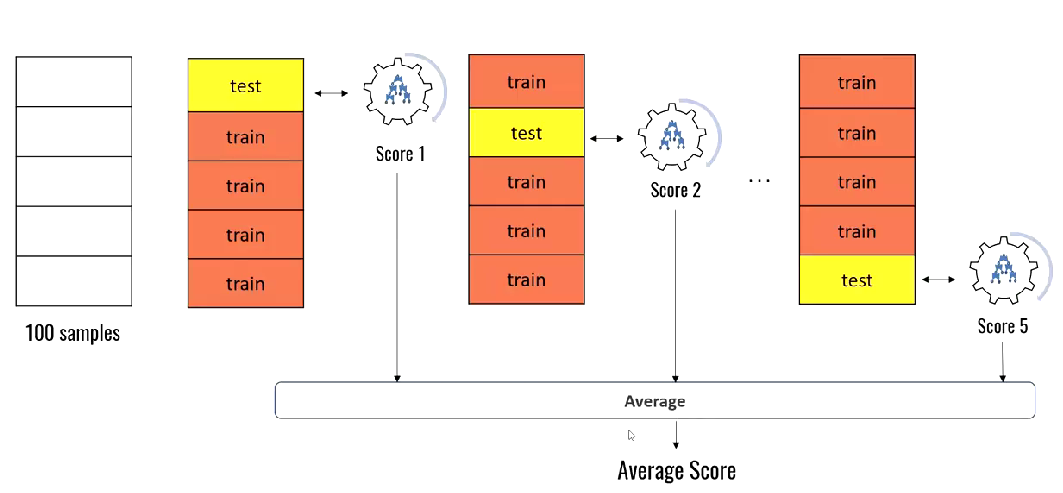

<div style='text-align:justify'>Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.</div>

### Purpose: Clasify the digits datasets with different algorithms & evaluate them

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

**train test split**

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9462962962962963

**SVM**

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5481481481481482

**Random Forest**

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Function get_score for measuring scores**

In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

**Use KFold for our digits example**

In [9]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [10]:
scores_lr = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_lr.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [11]:
scores_lr

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [12]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [13]:
scores_rf

[0.9315525876460768, 0.9616026711185309, 0.9398998330550918]

**In real Machine Learning problem you don't need that much code for cross validation score function.**

<h2 style='color:purple'>cross_val_score function</h2>

In [14]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [15]:
# This line doing the same thing like for loop mentioned before
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [16]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**random forest performance using cross_val_score**

In [17]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.93489149, 0.94991653, 0.92320534])

cross_val_score uses stratifield kfold by default

<h2 style='color:purple'>Parameter tunning using k fold cross validation</h2>

In [18]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8864804469273743

In [19]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.939891371818746

In [20]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9471073867163252

In [21]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9482402234636871

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-10-02    |   <font color=blue>**Ehsan Zia**</font>  |  |  |